In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams['svg.fonttype'] = 'none'

In [5]:
def plot_fsc(box_size,original_box_size,pixel_size,fsc_file):
    fig = plt.figure(figsize=(3,3))
    pixel_size = (original_box_size/box_size)*pixel_size
    desired_resolutions = np.array([10,4,3.0,2])
    desired_res_minor = np.array([9,8,7,6,5,3.9,3.8,3.7,3.6,3.5,3.4,3.3,3.2,3.1,2.9,2.8,2.7,2.6,2.5,2.4,2.3,2.2,2.1,1.9,1.8])
    
    df = pd.read_csv(fsc_file)
    df['res'] = box_size*pixel_size / df.wave_number
    sns.lineplot(df,x='wave_number',y='fsc_nomask',label='No mask',legend=False)
    sns.lineplot(df,x='wave_number',y='fsc_loosemask',label='Loose mask',legend=False)
    sns.lineplot(df,x='wave_number',y='fsc_tightmask',label='Tight mask',legend=False)
    
    plt.hlines(0.143,df.wave_number.min(),df.wave_number.max(),'grey',':')
    plt.xlim(df.wave_number.min(),df.wave_number.max())
    plt.ylim(0,1)
    fig.legend(loc='center',bbox_to_anchor=(0.3,0.5),ncols=1,frameon=False,columnspacing=1,fontsize='small',handlelength=1)
    plt.xlabel('Resolution (Å)')
    plt.ylabel('Fourier shell correlation')
    t=plt.gca().set_xticks(box_size*pixel_size /desired_resolutions,desired_resolutions)
    t=plt.gca().set_xticks(box_size*pixel_size /desired_res_minor,minor=True)

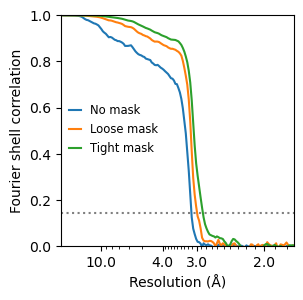

In [4]:
box_size = 320
original_box_size = 320
pixel_size = 0.86
fsc_file = 'data/raiA_FSC.csv'
plot_fsc(box_size,original_box_size,pixel_size,fsc_file)
plt.savefig('raiA_FSC.svg',dpi=400, bbox_inches="tight", transparent=True)
plt.savefig('raiA_FSC.png',dpi=400, bbox_inches="tight", transparent=True)

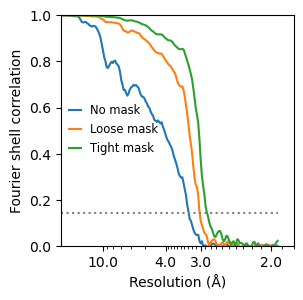

In [7]:
box_size = 240
original_box_size = 360
pixel_size = 0.954
fsc_file = 'data/ole_FSC.csv'
plot_fsc(box_size,original_box_size,pixel_size,fsc_file)
plt.savefig('ole_FSC.svg',dpi=400, bbox_inches="tight", transparent=True)
plt.savefig('ole_FSC.png',dpi=400, bbox_inches="tight", transparent=True)